<hr>
 I am interested in finding out what is the likelyhood of a person onboard titanic surviving , on account of his/her : 

 1. PClass (1D and 2D)
 2. Gender (1D and 2D)
 3. Age    (1D and 2D)

 i.e If they are more likely to survive due to any of the factors.
 <hr>


In [164]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('titanic_data.csv')

#importing titanic_data to dataframe.


In [165]:
#Cleaning

#First I am changing the column names to match the description at the kaggle site.

titanic_df.columns = ['PassengerID','Survival','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

print('There are '+str(len(titanic_df[titanic_df['Age'].isnull() == True]))+' rows with no Age data')
#I've decided to determine the influence of age , therefore I choose to remove all blank rows from the dataframe
#This will have the same impact as having age = 0 in the dataframe , but age = 0 will affect my future plots.


print('There are '+str(len(titanic_df[titanic_df['Embarked'].isnull() == True]))+' with no data on embarking point')
#Since this is only 2 rows , I choose to remove it. I don't think this had any impact on my results.

print('There are '+ str(len(titanic_df[titanic_df['Cabin'].isnull() == True])) +' with no data on Cabin')
#I've chosen to keep this null - since this is around 700 rows and the removal impacted my results significantly.
#Also, I am not interested in the influence cabin had over survival.

titanic_df = titanic_df[titanic_df['Age'].isnull() == False]       #Removing all rows with NaN age
titanic_df = titanic_df[titanic_df['Embarked'].isnull() == False]  #Removing all rows with embarked column empty


print('There are still '+str(len(titanic_df[titanic_df.isnull()]))+' rows with null values in one/more columns')
#But they all contain survival data - so I'm choosing to keep them.

There are 177 rows with no Age data
There are 2 with no data on embarking point
There are 687 with no data on Cabin
There are still 712 rows with null values in one/more columns


<hr>
# Observations after Cleaning :
print(len(titanic_df[titanic_df['Sex'].isnull()]))  # No rows with Null values for Sex  <br>
print(len(titanic_df[titanic_df['Pclass'].isnull()])) #No rows with null value for Pclass <br>
print(len(titanic_df[titanic_df['Survival'].isnull()])) #No rows with NaN for Survival <br>

#titanic_df = titanic_df[titanic_df['Cabin'].isnull() == False] --> Too many data to delete , I've chosen to ignore<br><br>
<hr>
I'm following the convention : <ul>
<li>groupby_xxx = variable for groupby object</li>
<li>plot_xxx = plot variable for the type xxx</li>
<hr>

In [166]:
def returnMeanByGroup(Attribute):
    return titanic_df.groupby(Attribute)['Survival'].mean()
#Group by function for attribute 'Attribute - Used for 1D analysis.

def set_sex_values(column_data):
    if column_data == 'male':
        return 1
    else:
        return 2

titanic_df['gender'] = titanic_df['Sex'].apply(set_sex_values) #Same thing as Map.

# This quantifies Gender as Male = 1 or Female = 2 , because it is difficult to quantifiably find a correlation between a string
# and boolean (Survival) - (categorical vs categorical)


In [167]:
#Here I find out what is the likelyhood that a person aboard (irrespective of their gender,age etc are likely to survive)
series_total_count = titanic_df.groupby('Survival',as_index = False).size()

count_survived = series_total_count.iloc[1]

count_total = series_total_count.iloc[0] + count_survived
print('Likelyhood of Survival :'+ str((count_survived/float(count_total))))

Likelyhood of Survival :0.404494382022


In [169]:
# By Class.

#Check likelyhood of survival by Socio-Economic status
# titanic_df[titanic_df['Pclass'].isnull()] = There is no row without a valid SES.

print('Correlation quotient between Pclass and Survival'+str(titanic_df['Pclass'].corr(titanic_df['Survival']))
#As Pclass increases - chances of survival decreases - Negative pearson's correlation

#From the correlation value , we can conclude higher SES passengers were given preference during evacuation. 



groupby_pclass = returnMeanByGroup('Pclass')
groupby_class_percent = groupby_pclass * 100
%matplotlib inline
plot_pclass_ratio = groupby_class_percent.plot(kind='bar',title = "% Survival by PClass",color = 'r')
plot_pclass_ratio.set_ylabel("Percentage")





pclass_size_each_bin_survived = titanic_df.groupby(['Pclass','Survival'],as_index = False).size()
plot_pclass_survival = pclass_size_each_bin_survived.unstack().plot(kind='bar',stacked = True,figsize = (10,10),title = "Stacked Bar - Pclass-wise split up")
plot_pclass_survival.set_ylabel("Number of people")
plot_pclass_survival.legend(["Did not Survive","Survived"],loc = 'best')
plt.show()

#Out of all the people in 
#Pclass 1 - 64% survived
#PClass 2 - 48% survived
#Pclass 3 - 24% survived

#The differnce between Pclass 1 & 2 is not very much , however it is very large for pclas3. But we can't say the reason behind it 
#is SES affirmatively now.




SyntaxError: invalid syntax (<ipython-input-169-281fe149f027>, line 13)

('Correlation quotient between gender and Survival', 0.53676162334850352)


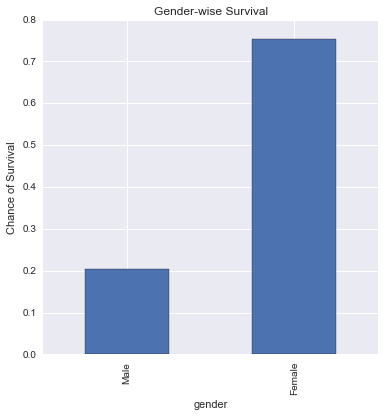

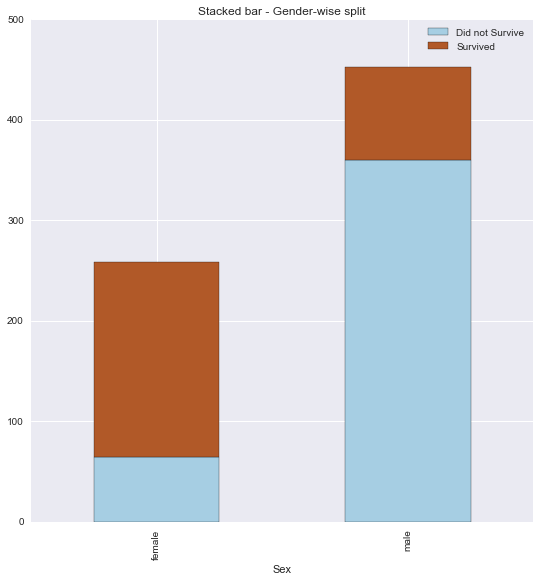

In [80]:
#By Gender

print('Correlation quotient between gender and Survival',titanic_df['gender'].corr(titanic_df['Survival']))
#Value of +0.538 indicate a positive correlation. As Gender value increases(inclining towards Female ) , Chance of Survival
#increases.

groupby_gender = returnMeanByGroup('gender')
#groupby_gender.sort(inplace = True)
plot_gender_ratio = groupby_gender.plot(kind='bar',figsize = (6,6),title = 'Gender-wise Survival')
plot_gender_ratio.set_ylabel("Chance of Survival") 
plot_gender_ratio.set_xticklabels(['Male','Female'])  #Thank you very much reviewer
plt.show()

pgender_size_each_bin_survived = titanic_df.groupby(['Sex','Survival'],as_index = False).size().unstack()
plot_pgender_survival = pgender_size_each_bin_survived.plot(kind = 'bar',stacked =True , colormap = 'Paired',figsize = (9,9),title = 'Stacked bar - Gender-wise split')
plot_pgender_survival.legend(['Did not Survive','Survived'],loc ='best')




Correlation quotient between Age and Survival-0.0824458680434


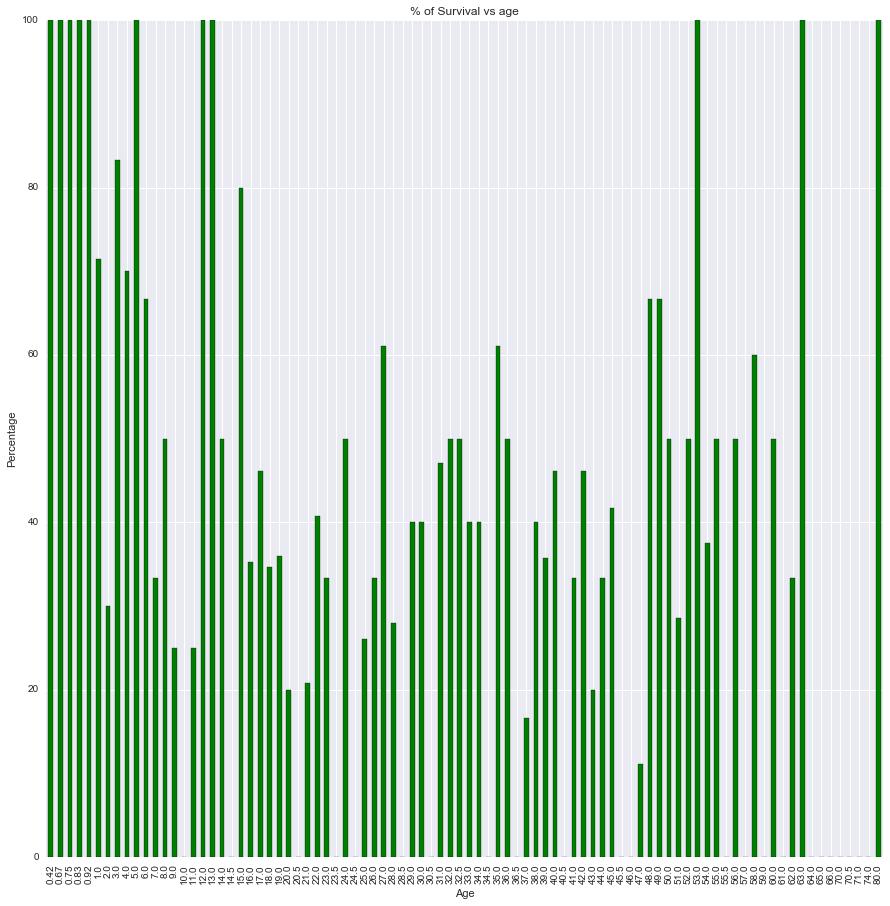

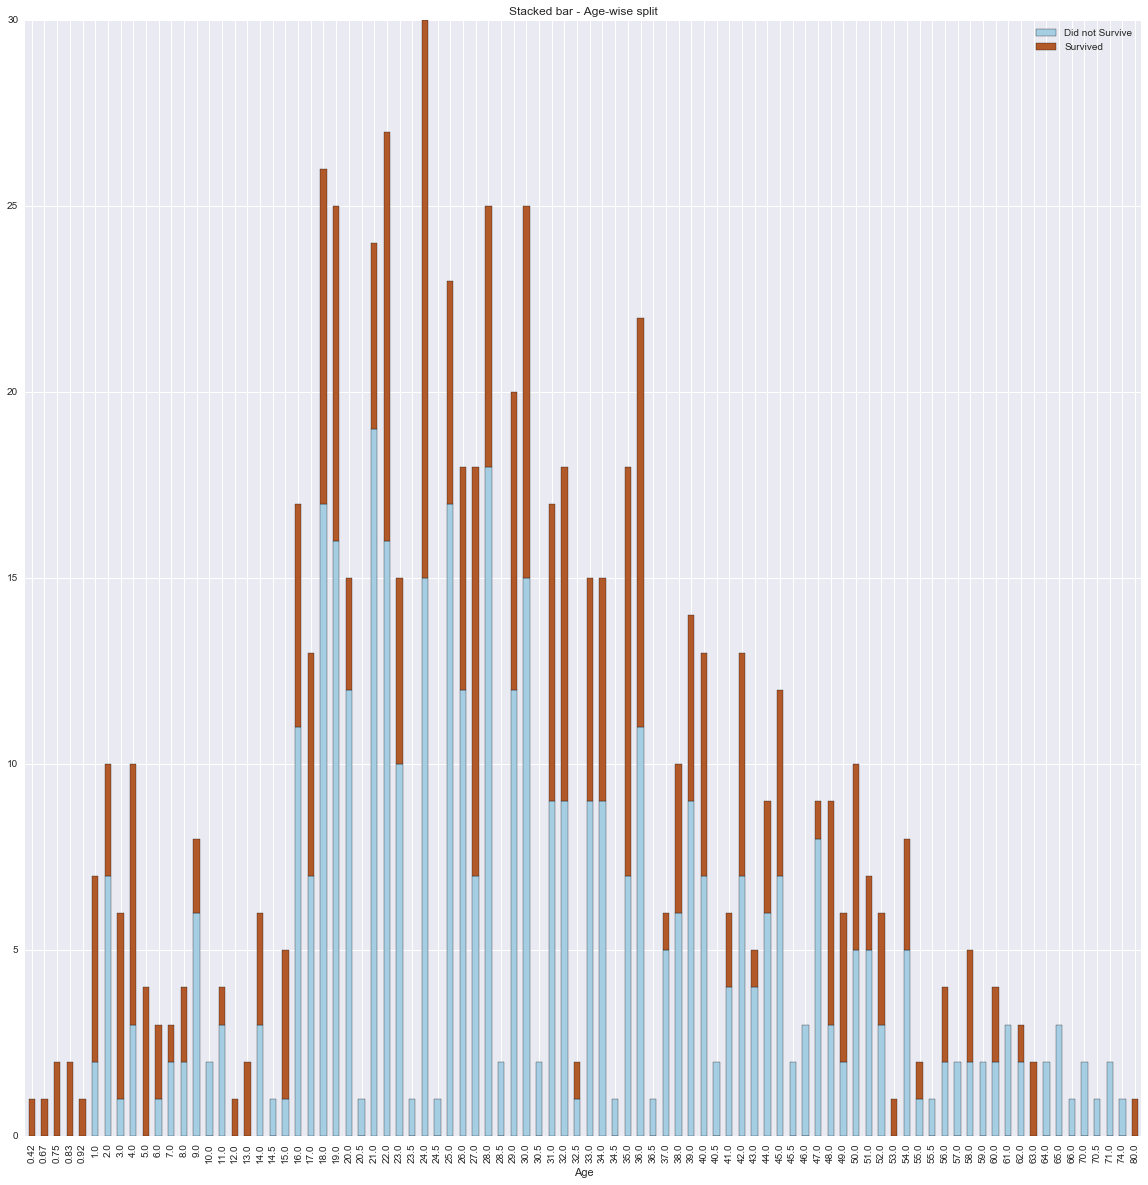

In [170]:
print('Correlation quotient between Age and Survival'+str(titanic_df['Age'].corr(titanic_df['Survival'])))
#Negative correlation indicates younger age groups are more likely to survive. However the correlation is not really strong.


groupby_age = returnMeanByGroup('Age')
groupby_age = groupby_age * 100
plot_age_ratio = groupby_age.plot.bar(color = 'g',title = '% of Survival vs age',figsize =(15,15))
plot_age_ratio.set_ylabel('Percentage')
#plot_age_ratio.set_xticks(min(plot_age_ratio['Age']),max(plot_age_ratio['Age'])+1,10.0)
plt.show()

page_size_each_bin_survived = titanic_df.groupby(['Age','Survival'],as_index = False).size().unstack()
plot_page_survival = page_size_each_bin_survived.plot(kind = 'bar',stacked =True , colormap = 'Paired',figsize = (20,20),title = 'Stacked bar - Age-wise split')
plot_page_survival.legend(['Did not Survive','Survived'],loc ='best')
plt.show()




# Conclusion :
From my analysis , I find that Gender has had a significant influence on the Survival of a person. It is likely that Women were evacuated first , after the collision. For the parameter Age : most of the children seem to have made it out safely, however, a normal adult has very little likelyhood of survival.
<br>
<hr>
Here is a little code I had written to check the survival rate of an adult - Adult defined as >=10 years of age and <=45 years<br><br>
page_adult_survival = titanic_df.groupby(['Age','Survival'],as_index = False)['Survival'].sum().reset_index()<br><br>
page_adult_survival = page_adult_survival[page_adult_survival['Age']>=10].append(page_adult_survival[page_adult_survival['Age']<=45])<br><br>
page_adult_survival.sum()['Survival'] / float(page_adult_survival.sum()['Survival']+page_adult_survival.sum()[0])<br><br>
And the result is 0.16 or only 16% adults aboard has survived.
<hr>

Pclass 1 and 2 have a good chance of surviving the incident. However people in Pclass 3 have little chance to survive. I assume this is due to the location of the cabin  - which is assigned based on convinience/luxury for Pclass 1 and 2 and availability for Pclass3. It is entirely likely , Pclass3 had been in the lowest deck and Pclass 1 in the higest deck , and hence were able to evacute quicker.

<hr>
None of these are statistically backed-up though. It is likely the same numbers applied to some other experiment would provide different result. i.e The results may/may not be statistically significant - therefore I cannot say certainly that Pclass/Age/Sex is the only determining factor in Survival.

My reasoning would make sense only if further data like - physical location of cabin , or how the water had entered the ship and how the evacuation was carried out is given (Who is evacuated first , on what criteria). Until this I can only make a correlation between a parameter and Survival rate.